In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image


In [2]:
iris_data = datasets.load_iris()

X = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
y = iris_data.target

In [3]:
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)

In [5]:
y_predict = model.predict(X_test)

In [6]:
y_predict.ravel()

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [7]:
y_test.ravel()

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [8]:
print(classification_report(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       1.00      1.00      1.00        17
          2       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        45

1.0


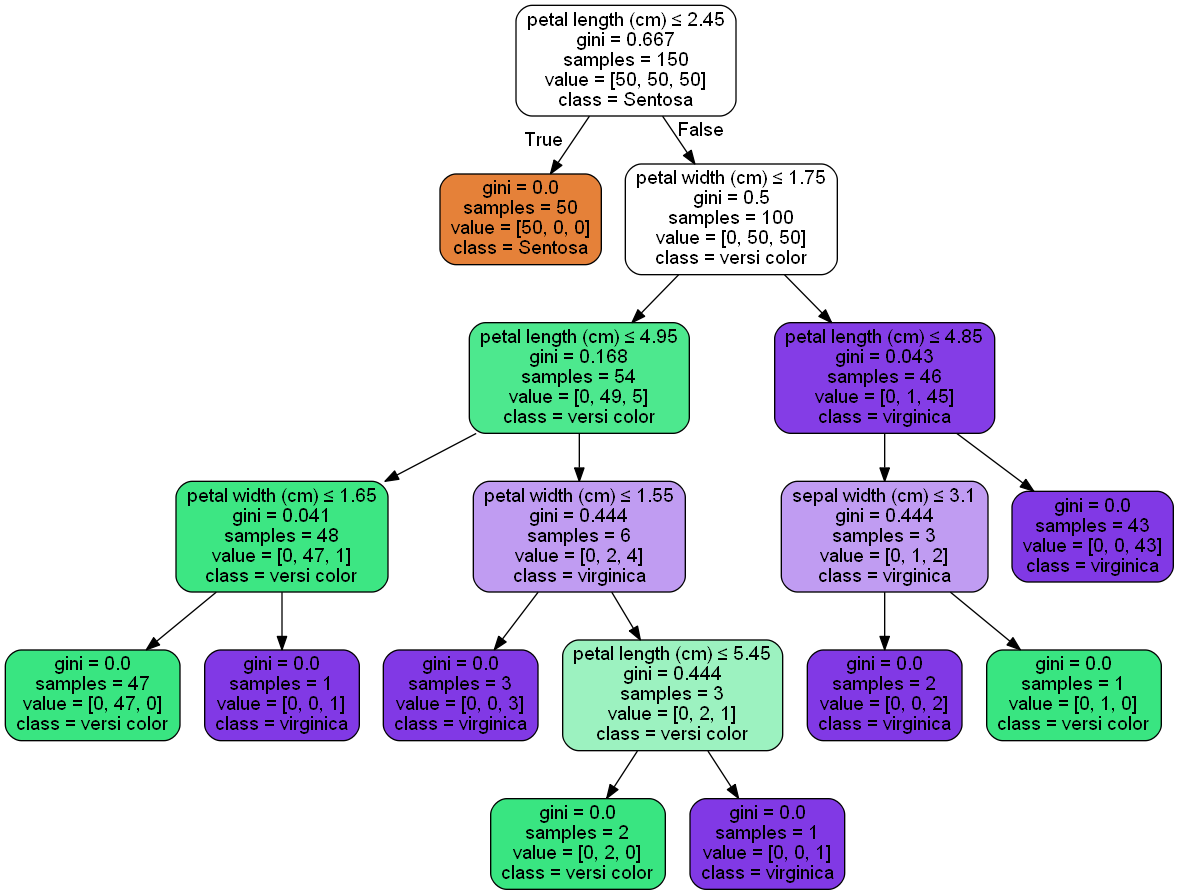

In [9]:
dot_data = StringIO()
export_graphviz(model,out_file=dot_data,filled=True,feature_names=iris_data.feature_names,class_names=['Sentosa','versi color','virginica'],
               rounded=True,special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Breast-cancer prediction

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [11]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
model = DecisionTreeClassifier(random_state=15)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,
                                                random_state = 10)

In [14]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=15,
            splitter='best')

In [15]:
model.score(X_train,y_train)

1.0

In [16]:
model.score(X_test,y_test)

0.916083916083916

In [17]:
tree = DecisionTreeClassifier(max_depth=3,random_state=15)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=15,
            splitter='best')

In [18]:
tree.score(X_train,y_train)

0.9624413145539906

In [19]:
tree.score(X_test,y_test)

0.9370629370629371

In [20]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="mytree.dot",class_names=['malignant',"benign"],
    feature_names=cancer.feature_names,impurity=False,filled=True)
import graphviz
with open("mytree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphviz'